In [1]:
import numpy as np
import pandas as pd
import os

os.environ["OMP_NUM_THREADS"] = "1" # address the k-means warning

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("pca_output.csv")
df

,PC1,PC2,PC3,PC4,country,region,subregion
0,-2.913025,0.095621,-0.718118,1.005255,Afghanistan,Asia,Southern Asia
1,0.429911,-0.588156,-0.333486,-1.161059,Albania,Europe,Southern Europe
2,-0.285225,-0.455174,1.221505,-0.868115,Algeria,Africa,Northern Africa
3,-2.932423,1.695555,1.525044,0.839625,Angola,Africa,Middle Africa
4,1.033576,0.136659,-0.225721,-0.847063,Antigua and Barbuda,North America,Caribbean
...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,Vanuatu,Oceania,Melanesia
163,-0.551036,-1.233886,3.101350,-0.115311,Venezuela,South America,South America
164,0.498524,1.390744,-0.238526,-1.074098,Vietnam,Asia,South-Eastern Asia
165,-1.887451,-0.109453,1.109752,0.056257,Yemen,Asia,Western Asia


In [28]:
pc = df[["PC1", 'PC2', 'PC3', 'PC4']]
pc

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


In [29]:
# Fitting 6-means clustering model
k = 6 # suppose clusters will match the continent
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(pc)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

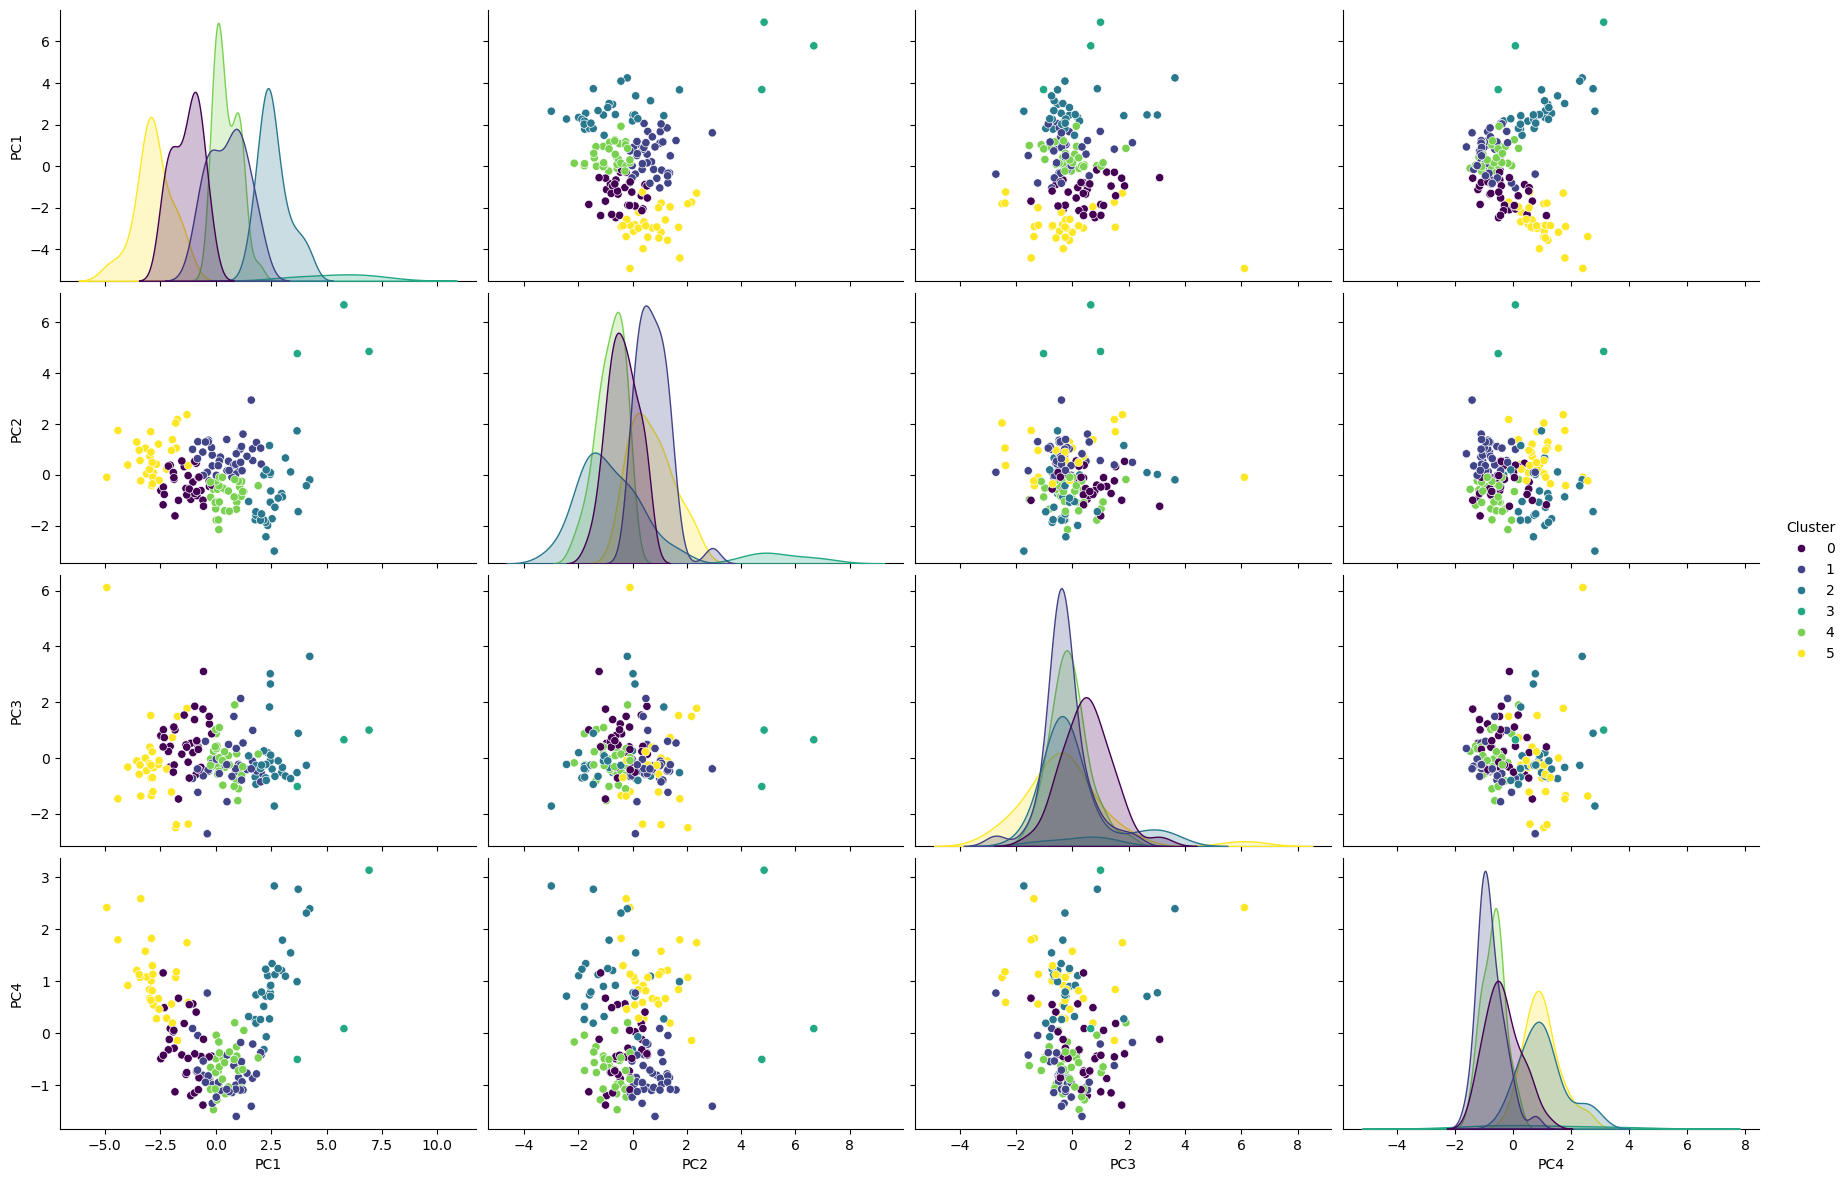

C:\Users\linxi\AppData\Local\Temp\ipykernel_20900\80672599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc.drop('Cluster', axis=1, inplace=True)


In [35]:
# scatterplot matrix
pc.loc[:,'Cluster'] = labels
sns.pairplot(pc, hue='Cluster', palette='viridis', height=3, aspect=1.5)
plt.show()
pc.drop('Cluster', axis=1, inplace=True)

C:\Users\linxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\linxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


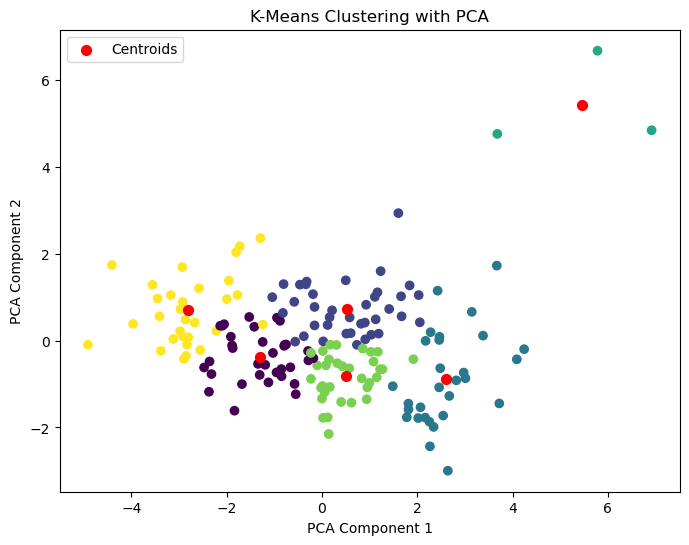

In [36]:
# Using PCA to visualize the cluster
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(pc.iloc[:,0:4])

# Plot the reduced data with cluster labels
plt.figure(figsize=(8,6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], s=50, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.show()

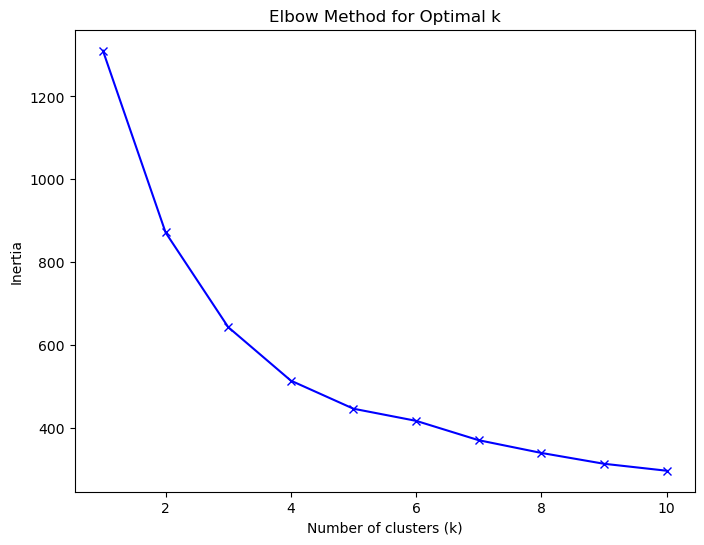

In [37]:
# Produce Elbow plot to get an optimal num of clusters
inertia = [] # used to store wcss
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\Users\linxi\AppData\Local\Temp\ipykernel_20900\1049627916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc.loc[:,'Cluster'] = labels


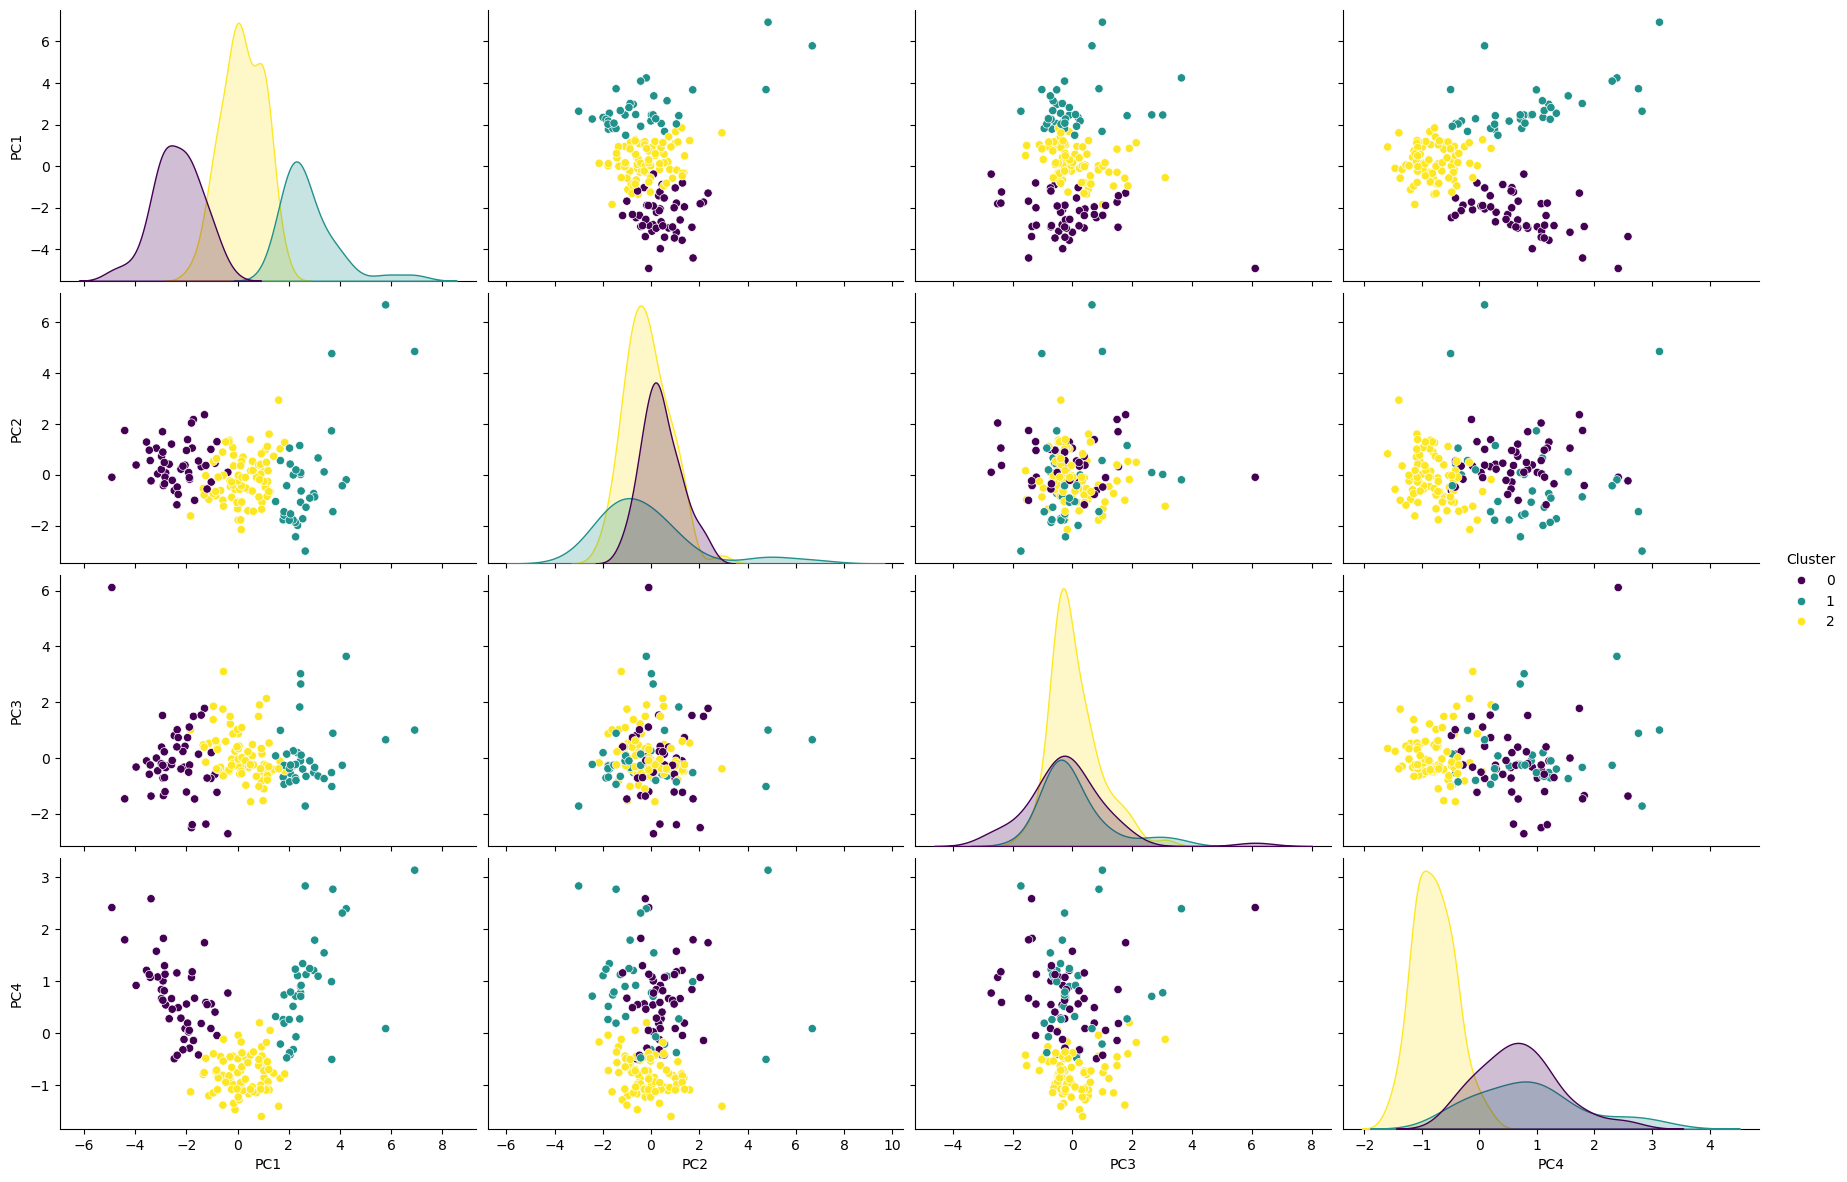

C:\Users\linxi\AppData\Local\Temp\ipykernel_20900\1049627916.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc.drop('Cluster', axis=1, inplace=True)


In [38]:
# Fit 3-means model based on the result from Elbow plot
k = 3 
kmeans = KMeans(n_clusters=k, random_state=666)
kmeans.fit(pc)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pc.loc[:,'Cluster'] = labels
sns.pairplot(pc, hue='Cluster', palette='viridis', height=3, aspect=1.5)
plt.show()
pc.drop('Cluster', axis=1, inplace=True)

C:\Users\linxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\linxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


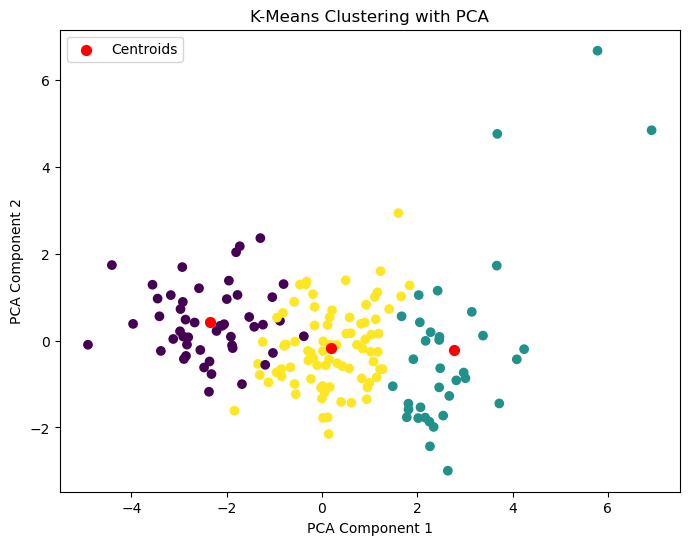

In [39]:
# Using PCA to visualize the cluster
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(pc.iloc[:,0:4])

# Plot the reduced data with cluster labels
plt.figure(figsize=(8,6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], s=50, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.show()